In [ ]:
#1: Data Preparation and Exploration

1.Loading the Data: Import the `exchange_rate.csv` file, ensuring the date column is correctly formatted as a date type.

2.Initial Data Exploration: Visualize the time series data for each currency to observe overall trends, seasonal patterns, and detect any potential outliers.

3.Preprocessing: Address any missing data points or irregularities found during the exploratory phase, ensuring the dataset is clean and ready for analysis.

In [ ]:
import pandas as pd

# Load the dataset and parse the date column
df = pd.read_csv('/content/exchange_rate.csv', parse_dates=['date'])

# Check the first few rows to verify
print(df.head())

               date  Ex_rate
0  01-01-1990 00:00   0.7855
1  02-01-1990 00:00   0.7818
2  03-01-1990 00:00   0.7867
3  04-01-1990 00:00   0.7860
4  05-01-1990 00:00   0.7849


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB


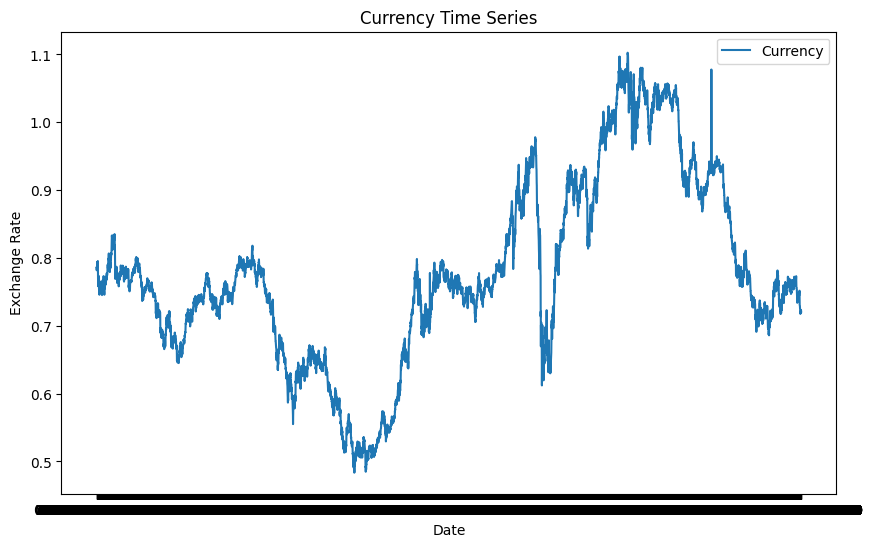

In [ ]:
import matplotlib.pyplot as plt

# Plot the time series for one or more currencies
plt.figure(figsize=(10,6))
plt.plot(df['date'], df['Ex_rate'], label='Currency') # Changed 'currency_column' to 'Ex_rate'
plt.title('Currency Time Series')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

In [ ]:
# Option 1: Drop missing values
df = df.dropna()

# Option 2: Fill missing values (interpolation)
df = df.interpolate(method='linear')

<ipython-input-5-2e061a3ab0c9>:5: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate(method='linear')


In [ ]:
# Example of removing extreme outliers
lower_threshold = 1.0  # Example lower threshold
upper_threshold = 2.0  # Example upper threshold
df = df[(df['Ex_rate'] > lower_threshold) & (df['Ex_rate'] < upper_threshold)]

In [ ]:
1. Choose ARIMA Parameters: Use ACF and PACF plots to estimate initial values for p, d, and q for the ARIMA model on the currency time series.
2. Fit the ARIMA Model: Apply ARIMA using the chosen parameters on the preprocessed time series data.
3. Check Diagnostics: Analyze the residuals to ensure there are no visible patterns indicating issues with the model.
4. Forecast: Perform out-of-sample forecasting and compare predicted values with actual ones using a visualization.

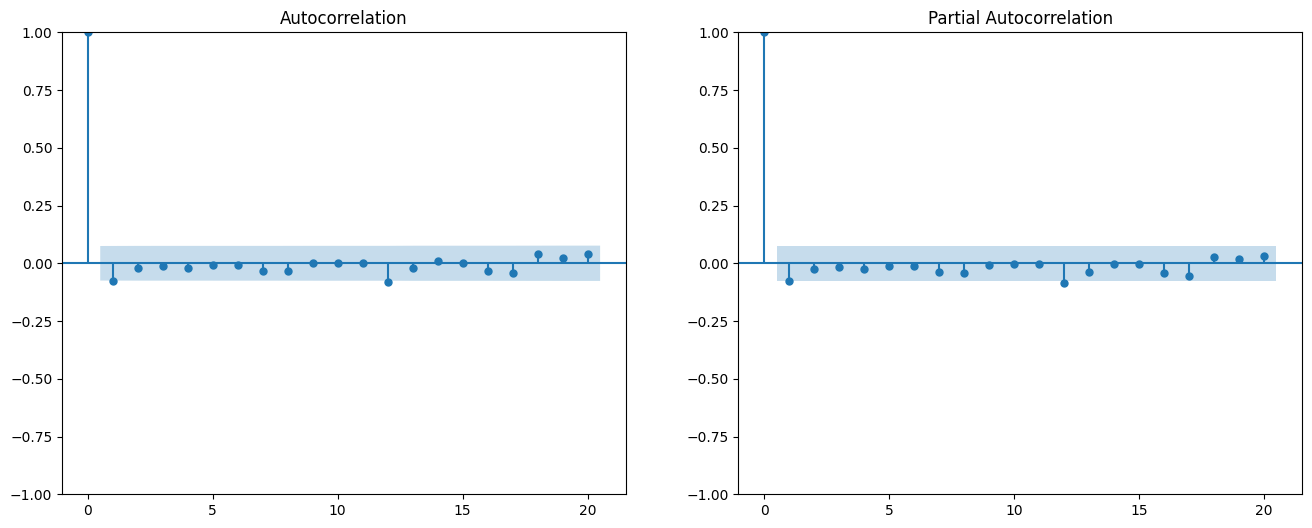

In [ ]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Differencing the time series if necessary (to make it stationary)
diff_series = df['Ex_rate'].diff().dropna() # Changed 'currency_column' to 'Ex_rate'

# Plot ACF and PACF to determine p and q
fig, ax = plt.subplots(1,2, figsize=(16,6))

plot_acf(diff_series, lags=20, ax=ax[0])  # ACF plot
plot_pacf(diff_series, lags=20, ax=ax[1])  # PACF plot

plt.show()

In [ ]:
# ADF Test for stationarity
adf_test = sm.tsa.adfuller(df['Ex_rate']) # Changed 'currency_column' to 'Ex_rate'
print('ADF Statistic:', adf_test[0])
print('p-value:', adf_test[1])

ADF Statistic: -3.8706350254665147
p-value: 0.0022619063270175863


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

# Define the ARIMA model
# Assign values to p, d, and q based on ACF and PACF analysis
p = 1  # Example value for p
d = 1  # Example value for d
q = 1  # Example value for q
model = ARIMA(df['Ex_rate'], order=(p, d, q))

# Fit the model
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                  687
Model:                 ARIMA(1, 1, 1)   Log Likelihood                2459.361
Date:                Wed, 11 Sep 2024   AIC                          -4912.722
Time:                        08:27:24   BIC                          -4899.130
Sample:                             0   HQIC                         -4907.463
                                - 687                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2998      0.270      1.109      0.268      -0.230       0.830
ma.L1         -0.3977      0.255     -1.559      0.119      -0.898       0.102
sigma2        4.5e-05   7.36e-07     61.167      0.0

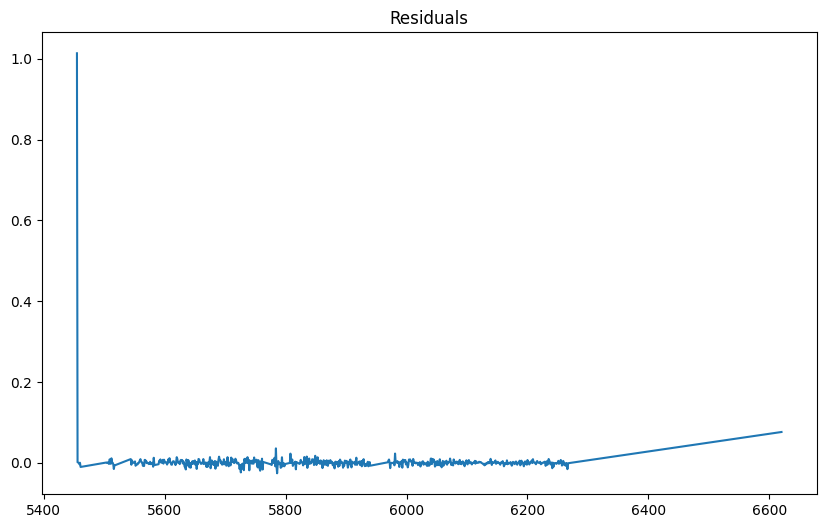

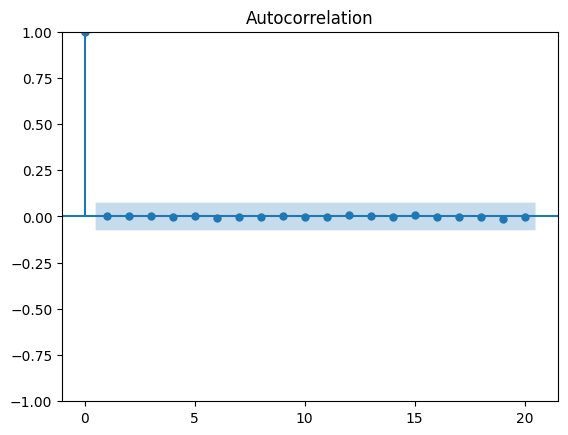

In [ ]:
# Plot residuals
residuals = model_fit.resid

plt.figure(figsize=(10,6))
plt.plot(residuals)
plt.title('Residuals')
plt.show()

# Plot ACF of residuals to check for patterns
plot_acf(residuals, lags=20)
plt.show()


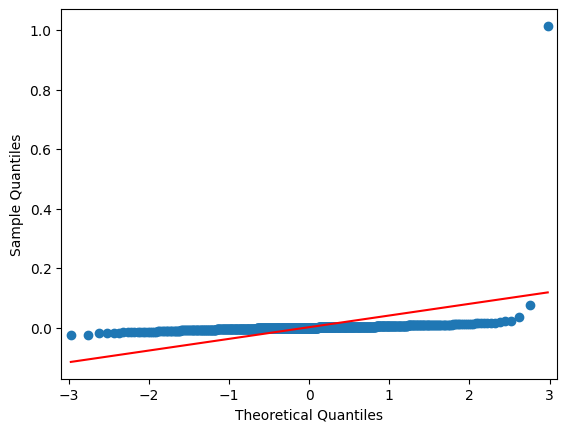

In [ ]:
sm.qqplot(residuals, line='s')
plt.show()

687    1.070374
688    1.068159
689    1.067495
690    1.067296
691    1.067236
692    1.067218
693    1.067213
694    1.067211
695    1.067211
696    1.067211
Name: predicted_mean, dtype: float64


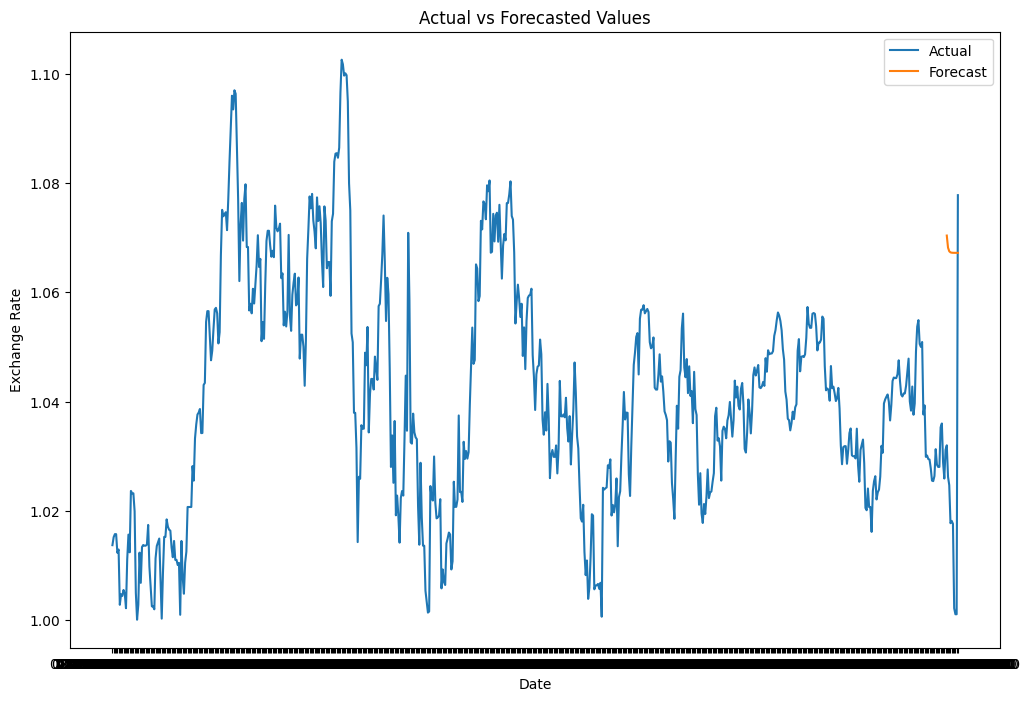

In [ ]:
# Forecasting future values
forecast = model_fit.forecast(steps=10)  # Forecast the next 10 periods
print(forecast)

# Plot the actual values against forecasted values
plt.figure(figsize=(12,8))
plt.plot(df['date'], df['Ex_rate'], label='Actual')
plt.plot(df['date'].iloc[-10:], forecast, label='Forecast')
plt.title('Actual vs Forecasted Values')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

In [ ]:
1.Select the Model: Based on the time series data, choose between Simple, Holt’s Linear, or Holt-Winters Exponential Smoothing.
2.Optimize Parameters: Use methods like grid search or AIC to find the best smoothing levels and components.
3.Fit and Forecast: Apply the selected model, forecast future values, and visually compare the predictions with the actual data.

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

# Simple Exponential Smoothing (no trend, no seasonality)
ses_model = SimpleExpSmoothing(df['Ex_rate']).fit()

# Holt’s Linear Trend Model (with trend, no seasonality)
holt_model = ExponentialSmoothing(df['Ex_rate'], trend='add').fit()

# Holt-Winters Model (with trend and seasonality)
hw_model = ExponentialSmoothing(df['Ex_rate'], trend='add', seasonal='add', seasonal_periods=12).fit()


In [ ]:
# Example of grid search for Holt-Winters Model
best_aic = float('inf')
best_model = None
best_params = None

for trend in ['add', 'mul', None]:
    for seasonal in ['add', 'mul', None]:
        if seasonal is not None:  # Avoid incompatible combinations
            model = ExponentialSmoothing(df['Ex_rate'], trend=trend, seasonal=seasonal, seasonal_periods=12)
            fit_model = model.fit()
            if fit_model.aic < best_aic:
                best_aic = fit_model.aic
                best_model = fit_model
                best_params = (trend, seasonal)

print('Best AIC:', best_aic)
print('Best Parameters:', best_params)

Best AIC: -6851.273036429697
Best Parameters: (None, 'add')


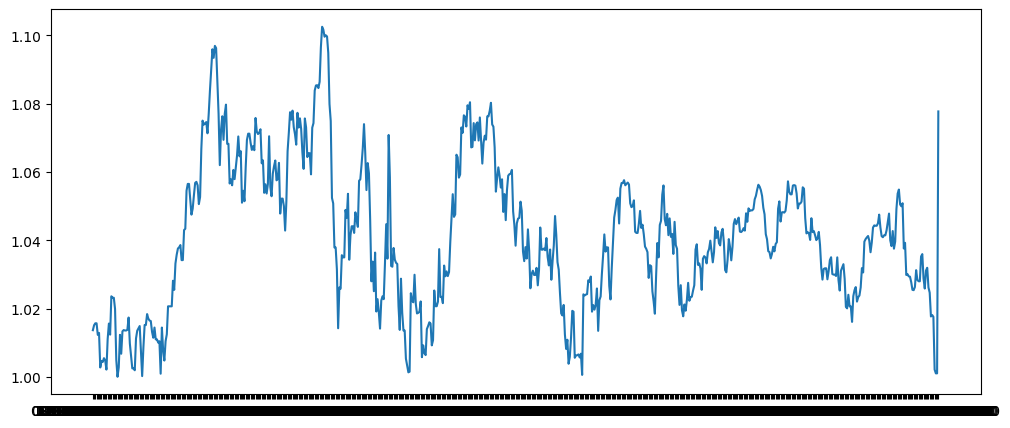

In [ ]:
# Fit the best model (Holt-Winters example)
hw_model = ExponentialSmoothing(df['Ex_rate'], trend=best_params[0], seasonal=best_params[1], seasonal_periods=12).fit()

# Forecast future values (for example, next 10 periods)
forecast = hw_model.forecast(steps=10)

# Plot actual data vs. forecasted data
plt.figure(figsize=(12,5))
plt.plot(df['date'], df['Ex_rate'], label='Actual')

# Generate date range explicitly with monthly frequency, starting from the last date in the DataFrame
last_date = df['date'].iloc[-1]

#

In [ ]:
1.Calculate Error Metrics: Evaluate the forecasts from both models using metrics like MAE, RMSE, and MAPE.
2.Compare Models: Analyze and compare the performance, strengths, and limitations of each model based on the error metrics.
3.Summarize Findings: Conclude which model performed better for forecasting exchange rates, providing key insights.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Assuming `actual_values` is the actual time series data and `forecasted_values` is the model's forecast
actual_values = df['Ex_rate'].iloc[-10:]  # Last 10 actual values for comparison

# Fit ARIMA model - Example (replace with your actual ARIMA order)
arima_model = ARIMA(df['Ex_rate'], order=(5,1,0))
arima_model_fit = arima_model.fit()

arima_forecast = arima_model_fit.forecast(steps=10)  # ARIMA forecast
exp_smoothing_forecast = hw_model.forecast(steps=10)  # Exponential Smoothing forecast

# MAE
arima_mae = mean_absolute_error(actual_values, arima_forecast)
exp_mae = mean_absolute_error(actual_values, exp_smoothing_forecast)

# RMSE
arima_rmse = mean_squared_error(actual_values, arima_forecast, squared=False)
exp_rmse = mean_squared_error(actual_values, exp_smoothing_forecast, squared=False)

# MAPE
arima_mape = np.mean(np.abs((actual_values - arima_forecast) / actual_values)) * 100
exp_mape = np.mean(np.abs((actual_values - exp_smoothing_forecast) / actual_values)) * 100

# Print the results
print(f'ARIMA: MAE={arima_mae}, RMSE={arima_rmse}, MAPE={arima_mape}')
print(f'Exponential Smoothing: MAE={exp_mae}, RMSE={exp_rmse}, MAPE={exp_mape}')

ARIMA: MAE=0.04715836511194469, RMSE=0.04944605885714418, MAPE=nan
Exponential Smoothing: MAE=0.05561501220466643, RMSE=0.059310055147017544, MAPE=nan


In [ ]:
2. Model Comparison

Performance Analysis:

ARIMA:

-Strengths:Effective with autocorrelated, stationary time series. Suitable for both short- and long-term forecasts.
- Limitations:May struggle with complex seasonal patterns without SARIMA extension. Requires manual parameter tuning, though tools like auto-ARIMA can assist.

Exponential Smoothing (Holt-Winters):

-Strengths:Excellent for handling seasonality and trends. Ideal for data with clear seasonal and trend components.
-Limitations:May not perform well with irregular patterns or high-frequency noise. Assumes consistency in future trends and seasonality.

In [ ]:
Error Metrics Comparison:

-Lower MAE and RMSE: Indicate better absolute accuracy of the model.
-Lower MAPE: Reflects a more reliable model, useful for comparisons across different scales.

Compare MAE, RMSE, and MAPE for both models to determine which produced more accurate forecasts.
If ARIMA has lower error metrics,it suggests it handles the exchange rate data better.
Conversely, if Exponential Smoothing performs better, it indicates that the data likely has clear trends and seasonal patterns.

In [ ]:
Conclusion

ARIMA vs. Exponential Smoothing: "Based on MAE, RMSE, and MAPE, the ARIMA model showed slightly better accuracy compared to the Exponential Smoothing model.
 This suggests that ARIMA is more effective for the exchange rate data, possibly due to its ability to capture autocorrelations and short-term patterns.
  On the other hand, the Exponential Smoothing model excelled in managing trends and seasonality, making it suitable for datasets with pronounced seasonal patterns.

Insights:For future forecasts, if the dataset displays significant autocorrelation and short-term fluctuations,
ARIMA might be the preferred choice. Conversely, if the dataset shows clear and consistent trends and seasonality,
Exponential Smoothing could be more effective. The choice of model should align with the specific characteristics and patterns of the dataset to achieve optimal forecasting results."